# Tutorial 3: Building a circular machine

# Python libraries 

In [8]:
##############Ç###########################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

# Launching MAD-X

In [9]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.01.18 20:14:09      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Questions

#### 1. Consider the first FODO cell designed in Tutorial 2 and add 4 sector dipoles of 15 m long, assuming a drift space between the magnets as illustrated in Fig. 4.  For computing the required bending angle, consider a ring with 736 dipoles with equal bending angles.




#### First, we compute the required bending angle for a circular orbit:

#### $2*\pi=N\theta$

In [10]:
2*np.pi/736

0.008536936558667916

In [11]:
madx.call('Tutorial3_solution.madx')

! ****************************************************************************

! Adding dipoles to the Tutorial 2 first FODO lattice

! 

! ****************************************************************************



! ****************************************************************************

! Definition of parameters

! ****************************************************************************



l_cell=100;

quadrupoleLength=5;

myKF:=2.8/l_cell/quadrupoleLength;// m^-2

myKD:=-myKF;

nBend=736;

dipoleLength=15;

myAngle=2*pi/nBend;



! ****************************************************************************

! Definition of magnets

! **************************************************************************** 

QF: quadrupole, L=quadrupoleLength, K1:=myKF;

QD: quadrupole, L=quadrupoleLength, K1:=myKD;

BM: sbend, L=dipoleLength, angle:=myAngle;



! ****************************************************************************

! Definition of sequence

! ***********

#### Saving the content of the TWISS and SUMM tables in two panda dataframes named as first_twiss_with_dipoles and first_summary_with_dipoles

In [12]:
first_twiss_with_dipoles=madx.table.twiss.dframe()
first_summary_with_dipoles=madx.table.summ.dframe()

#### Selecting the desired columns:

In [13]:
first_twiss_with_dipoles[['name', 'keyword', 's','x','y','px','py','betx', 'alfx', 'mux', 
                          'bety', 'alfy', 'muy','dx','dy','dpx','dpy',]]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,160.547514,-2.259046,0.000000,34.217492,0.548735,0.000000,2.768500,0.0,0.039218,-0.0
q1,q1:1,quadrupole,5.0,0.0,0.0,0.0,0.0,160.547514,2.259046,0.004843,34.217492,-0.548735,0.023892,2.768500,0.0,-0.039218,0.0
drift_0[0],drift_0:0,drift,10.0,0.0,0.0,0.0,0.0,138.907441,2.068969,0.010172,40.655458,-0.738858,0.045293,2.572412,0.0,-0.039218,0.0
b1,b1:1,sbend,25.0,0.0,0.0,0.0,0.0,85.384548,1.499138,0.032163,71.376768,-1.309229,0.090204,2.056561,0.0,-0.029562,0.0
drift_1[0],drift_1:0,drift,30.0,0.0,0.0,0.0,0.0,71.343992,1.308974,0.042366,85.419675,-1.499352,0.100402,1.908751,0.0,-0.029562,0.0
b2,b2:1,sbend,45.0,0.0,0.0,0.0,0.0,40.628665,0.738665,0.087302,138.955807,-2.069723,0.122384,1.537755,0.0,-0.019904,0.0
drift_2[0],drift_2:0,drift,50.0,0.0,0.0,0.0,0.0,34.193082,0.548451,0.108717,160.603655,-2.259847,0.127712,1.438237,0.0,-0.019904,0.0
q2,q2:1,quadrupole,55.0,0.0,0.0,0.0,0.0,34.193082,-0.548451,0.132626,160.603655,2.259847,0.132553,1.438237,0.0,0.019904,0.0
drift_3[0],drift_3:0,drift,60.0,0.0,0.0,0.0,0.0,40.628665,-0.738665,0.154041,138.955807,2.069723,0.137881,1.537755,0.0,0.019904,0.0
b3,b3:1,sbend,75.0,0.0,0.0,0.0,0.0,71.343992,-1.308974,0.198978,85.419675,1.499352,0.159863,1.908751,0.0,0.029562,0.0


In [14]:
first_summary_with_dipoles

,length,orbit5,alfa,gammatr,q1,dq1,betxmax,dxmax,dxrms,xcomax,...,synch_1,synch_2,synch_3,synch_4,synch_5,synch_6,synch_8,nflips,dqmin,dqmin_phase
#e,100.0,-0.0,0.000605,40.649555,0.236501,-0.330372,160.547514,2.7685,2.21206,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PLOT

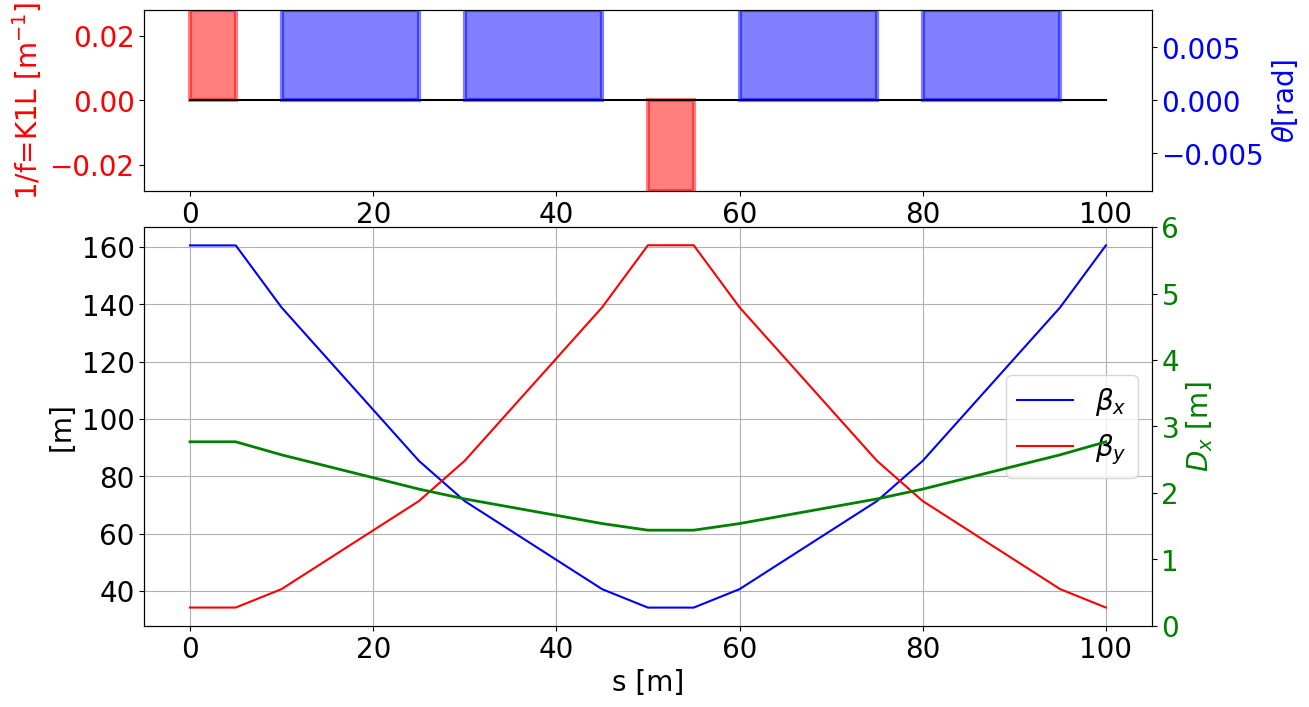

In [15]:
import sys
sys.path.append('../')
import lib_JUAS2024 as lib
lib.plot_layout(first_twiss_with_dipoles)

#### 2. Using the twiss command compute the linear optics functions. Do the dipoles (weak focusing) affect the maximum of the $\beta$-functions? And the dispersion?

#### First we compute the TWISS without the dipoles

In [16]:
myString='''
myAngle=0;
use,sequence=myCell;      
twiss;
'''
madx.input(myString);

++++++ info: myangle redefined
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.3307573246        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.3307573246        160.6036546                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 


#### Saving the content of the TWISS and SUMM table in two panda dataframes named as firts_twiss_without_dipoles and first_twiss_without_dipoles

In [17]:
first_twiss_without_dipoles=madx.table.twiss.dframe()
first_summary_without_dipoles=madx.table.summ.dframe()

#### From the TWISS data we can select the desired columns

In [18]:
first_twiss_without_dipoles[['name', 'keyword', 's','x','y','px','py','betx', 'alfx', 'mux', 
                              'bety', 'alfy', 'muy','dx','dy','dpx','dpy']]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,160.603655,-2.259847,0.000000,34.217492,0.548735,0.000000,0.0,-0.0,-0.0,-0.0
q1,q1:1,quadrupole,5.0,0.0,0.0,0.0,0.0,160.603655,2.259847,0.004841,34.217492,-0.548735,0.023892,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,10.0,0.0,0.0,0.0,0.0,138.955807,2.069723,0.010169,40.655458,-0.738858,0.045293,0.0,0.0,0.0,0.0
b1,b1:1,sbend,25.0,0.0,0.0,0.0,0.0,85.419675,1.499352,0.032151,71.376768,-1.309229,0.090204,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,30.0,0.0,0.0,0.0,0.0,71.376768,1.309229,0.042350,85.419675,-1.499352,0.100402,0.0,0.0,0.0,0.0
b2,b2:1,sbend,45.0,0.0,0.0,0.0,0.0,40.655458,0.738858,0.087260,138.955807,-2.069723,0.122384,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,50.0,0.0,0.0,0.0,0.0,34.217492,0.548735,0.108661,160.603655,-2.259847,0.127712,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,55.0,0.0,0.0,0.0,0.0,34.217492,-0.548735,0.132553,160.603655,2.259847,0.132553,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,60.0,0.0,0.0,0.0,0.0,40.655458,-0.738858,0.153953,138.955807,2.069723,0.137881,0.0,0.0,0.0,0.0
b3,b3:1,sbend,75.0,0.0,0.0,0.0,0.0,71.376768,-1.309229,0.198864,85.419675,1.499352,0.159863,0.0,0.0,0.0,0.0


#### We can now create a pandas dataframe with the information we want to compate from the TWISS obtained with and without dipoles

In [19]:
comparison=pd.DataFrame({'With dipoles':first_twiss_with_dipoles.max(),'Without dipoles':first_twiss_without_dipoles.max()})
comparison.loc[['betx', 'alfx', 'mux','bety', 'alfy', 'muy','dx','dy','dpx','dpy']]

,With dipoles,Without dipoles
betx,160.547514,160.603655
alfx,2.259046,2.259847
mux,0.236501,0.236373
bety,160.603655,160.603655
alfy,2.259847,2.259847
muy,0.236373,0.236373
dx,2.7685,0.0
dy,0.0,0.0
dpx,0.039218,0.0
dpy,0.0,0.0


#### And compute the relative variation on the maximum of the beta-function

In [20]:
betx_rel=(np.max(first_twiss_without_dipoles.betx)-np.max(first_twiss_with_dipoles.betx))/np.max(first_twiss_without_dipoles.betx)
print ("On the horizontal plane [%]")
print(betx_rel*100)

bety_rel=(np.max(first_twiss_without_dipoles.bety)-np.max(first_twiss_with_dipoles.bety))/np.max(first_twiss_without_dipoles.bety)
print("On the vertical plane [%]")
print(bety_rel*100)

On the horizontal plane [%]
0.03495607663009094
On the vertical plane [%]
0.0


#### We can also compute the impact on the beam size

In [21]:
# First we compute the beam size for each case
emittance_n=3e-6 #m*rad
beta_gamma=7000/.938 # this is an approximation

sigma_no_dipoles=np.sqrt(np.max(first_twiss_without_dipoles.betx)*emittance_n/beta_gamma)
print(sigma_no_dipoles)

sigma_with_dipoles=np.sqrt(np.max(first_twiss_with_dipoles.betx)*emittance_n/beta_gamma)
print(sigma_with_dipoles)

0.00025409185177743577
0.0002540474376245261


In [22]:
#Relative variation [%]
betx_rel=(sigma_no_dipoles-sigma_with_dipoles)/sigma_no_dipoles
print("On the horizontal beam size [%]")
print(betx_rel*100)

On the horizontal beam size [%]
0.017479565991182517


#### 3. From the phase advance of the FODO cell compute the horizontal and vertical tunes of the machine

#### First we need to compute the total number of FODO cells needed for this machine

In [23]:
Ncells=736/4 
Ncells

184.0

#### The machine tunes are therefore:

#### REMEMBER the relation between the tune and the phase advance: Q=$\mu/(2\pi)$

#### Then, the tunes of the machine are:

In [24]:
display(Ncells*first_twiss_with_dipoles['mux'].max())
display(Ncells*first_twiss_with_dipoles['muy'].max())

43.516126037479125

43.49260436271754

#### Being the tune of a single FODO cell:

In [25]:
display(first_twiss_with_dipoles['mux'].max())
display(first_twiss_with_dipoles['muy'].max())

0.23650068498629961

0.23637284979737794

#### 4. Using the MAD-X match block on a single FODO cell, match the tunes of the machine to 46.0 in both planes.

		match, sequence = ??;
		global, q1 = ??;
		global, q2 = ??;
		vary, name = ??, step = 0.00001;
		vary, name = ??, step = 0.00001;
		lmdif, call = 50, tolerance = 1e-6;
		endmatch;



#### Firts, we need to compute thetune of a single FODO cell to get a machine tune of 46 in both planes

In [26]:
Ncells=736/4 

In [27]:
46/Ncells

0.25

#### Now, we can define the MAD-X matching block as a python string to send the command to the MAD-X running process

In [28]:
myString='''

! *********************************************************************
! TWISS BEFORE MATCHING
! *********************************************************************

twiss, table=beforematching, file="BeforeMatching.txt";

! *********************************************************************
! INITIAL TUNE VALUES
! *********************************************************************

value, table(summ,Q1)*(nBend/4);
value, table(summ,Q2)*(nBend/4);

! *********************************************************************
! MATCHING
! *********************************************************************

phaseWantedX=46.0/(nBend/4);
phaseWantedY=46.0/(nBend/4);

MATCH, SEQUENCE=myCell;
GLOBAL, Q1=phaseWantedX;//H-tune
GLOBAL, Q2=phaseWantedY;//V-tune
VARY, NAME= myKF, STEP=0.00001;
VARY, NAME= myKD, STEP=0.00001;
LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
ENDMATCH;

! *********************************************************************
! TWISS AFTER MATCHING
! *********************************************************************

twiss,table=aftermatching, file="AfterMatching.txt";

! *********************************************************************
! FINAL TUNE VALUES
! *********************************************************************

value, table(summ,Q1)*(736/4);
value, table(summ,Q2)*(736/4);

'''

In [29]:
madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.3307573246        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.3307573246        160.6036546                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

#### Saving the content of the TWISS and SUMM table in two panda dataframes named as twiss_after_matching and summary_after_matching

In [30]:
twiss_after_matching=madx.table['aftermatching'].dframe()
summary_after_matching=madx.table['summ'].dframe()

In [31]:
display(summary_after_matching["q1"])
display(summary_after_matching["q2"])

#e    0.25
Name: q1, dtype: float64

#e    0.25
Name: q2, dtype: float64

#### Selecting columns of interest

In [32]:
twiss_after_matching[['name', 'keyword', 's','x','y','px','py','betx', 'alfx', 'mux', 
                      'bety', 'alfy', 'muy','dx','dy','dpx','dpy']]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,162.614771,-2.395171,0.000000,30.941573,0.530900,0.000000,0.0,-0.0,-0.0,-0.0
q1,q1:1,quadrupole,5.0,0.0,0.0,0.0,0.0,162.614771,2.395171,0.004776,30.941573,-0.530900,0.026473,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,10.0,0.0,0.0,0.0,0.0,139.698768,2.188030,0.010057,37.286280,-0.738041,0.049987,0.0,0.0,0.0,0.0
b1,b1:1,sbend,25.0,0.0,0.0,0.0,0.0,83.379230,1.566606,0.032248,68.748874,-1.359465,0.097858,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,30.0,0.0,0.0,0.0,0.0,68.748874,1.359465,0.042767,83.379229,-1.566606,0.108376,0.0,0.0,0.0,0.0
b2,b2:1,sbend,45.0,0.0,0.0,0.0,0.0,37.286281,0.738041,0.090638,139.698767,-2.188030,0.130568,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,50.0,0.0,0.0,0.0,0.0,30.941573,0.530900,0.114152,162.614771,-2.395171,0.135848,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,55.0,0.0,0.0,0.0,0.0,30.941573,-0.530900,0.140624,162.614771,2.395171,0.140624,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,60.0,0.0,0.0,0.0,0.0,37.286281,-0.738041,0.164138,139.698767,2.188030,0.145905,0.0,0.0,0.0,0.0
b3,b3:1,sbend,75.0,0.0,0.0,0.0,0.0,68.748874,-1.359465,0.212009,83.379229,1.566606,0.168097,0.0,0.0,0.0,0.0


#### 5. If we change the beam energy to a total beam energy of 7 TeV, which are the new tunes of the machine? Why?

In [33]:
myString='''

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=7000;

! *********************************************************************
! TWISS
! *********************************************************************
twiss, sequence=myCell;

'''

In [34]:
madx.input(myString);

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2500001253      -0.3182401044        162.6147709                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2500001266 

               dq2            betymax              dymax              dyrms 
     -0.3182401056        162.6147706                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

#### Saving the content of the TWISS and SUMM table in two panda dataframes names as twiss_after_matching_7TeV and summary_after_matching_7TeV

In [35]:
twiss_after_matching_7TeV=madx.table['twiss'].dframe()
summary_after_matching_7TeV=madx.table['summ'].dframe()

In [36]:
twiss_after_matching_7TeV[['name', 'keyword', 's','x','y','px','py','betx', 'alfx', 'mux', 
                           'bety', 'alfy', 'muy','dx','dy','dpx','dpy']]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,162.614771,-2.395171,0.000000,30.941573,0.530900,0.000000,0.0,-0.0,-0.0,-0.0
q1,q1:1,quadrupole,5.0,0.0,0.0,0.0,0.0,162.614771,2.395171,0.004776,30.941573,-0.530900,0.026473,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,10.0,0.0,0.0,0.0,0.0,139.698768,2.188030,0.010057,37.286280,-0.738041,0.049987,0.0,0.0,0.0,0.0
b1,b1:1,sbend,25.0,0.0,0.0,0.0,0.0,83.379230,1.566606,0.032248,68.748874,-1.359465,0.097858,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,30.0,0.0,0.0,0.0,0.0,68.748874,1.359465,0.042767,83.379229,-1.566606,0.108376,0.0,0.0,0.0,0.0
b2,b2:1,sbend,45.0,0.0,0.0,0.0,0.0,37.286281,0.738041,0.090638,139.698767,-2.188030,0.130568,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,50.0,0.0,0.0,0.0,0.0,30.941573,0.530900,0.114152,162.614771,-2.395171,0.135848,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,55.0,0.0,0.0,0.0,0.0,30.941573,-0.530900,0.140624,162.614771,2.395171,0.140624,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,60.0,0.0,0.0,0.0,0.0,37.286281,-0.738041,0.164138,139.698767,2.188030,0.145905,0.0,0.0,0.0,0.0
b3,b3:1,sbend,75.0,0.0,0.0,0.0,0.0,68.748874,-1.359465,0.212009,83.379229,1.566606,0.168097,0.0,0.0,0.0,0.0


#### Machine tunes at 2 GeV after the matching

In [37]:
display(Ncells*twiss_after_matching['mux'].max())
display(Ncells*twiss_after_matching['muy'].max())

46.00002306009036

46.000023286351194

#### Machine tunes at 7000 GeV after the matching

In [38]:
display(Ncells*twiss_after_matching_7TeV['mux'].max())
display(Ncells*twiss_after_matching_7TeV['muy'].max())

46.00002306009036

46.000023286351194

#### **Conclusion**: since the K1 is normalized to the beam rigidity, the beam energy has no impact on the beta fuctions and on the phase advance, therefore the tunes are the same.

#### However, watch out the definition of the chromaticity (DQ1 and DQ2) and all the momentum derivative quantities in MAD-X which are normalised to the beta relativistic factor. For such variables the energy definition will have an impact on the computed values by MAD-X.

#### **Rememeber the concept of chromaticity**

<div>
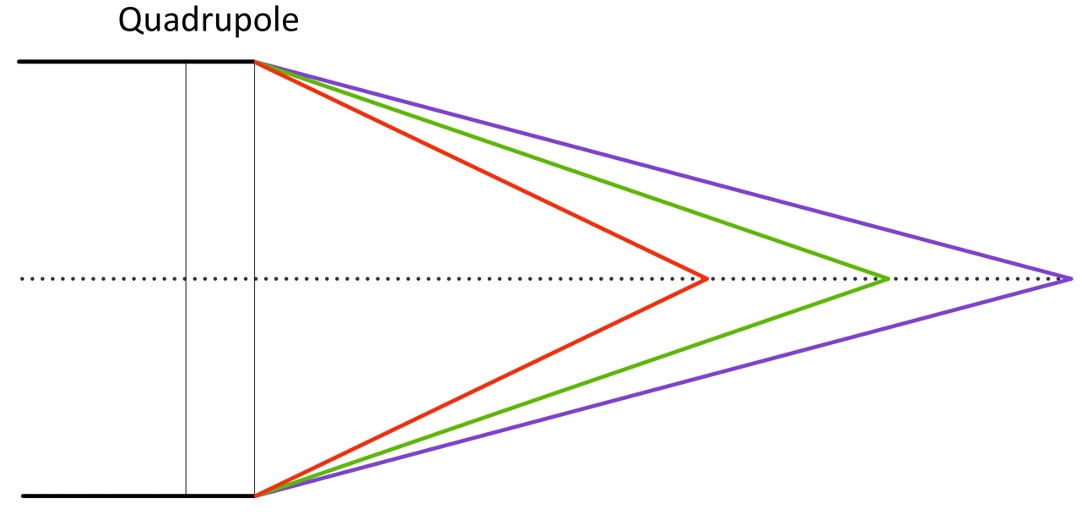
</div>

#### Machine chromaticity at 2 GeV

In [39]:
display(summary_after_matching.iloc[0][['dq1','dq2']])

dq1   -0.360356
dq2   -0.360356
Name: #e, dtype: float64

#### Machine chromaticity at 7000 GeV

In [40]:
display(summary_after_matching_7TeV.iloc[0][['dq1','dq2']])

dq1   -0.31824
dq2   -0.31824
Name: #e, dtype: float64

#### Whatch out the importance of the relativistic beta factor for the chromaticity!

In [41]:
beta_r3=np.sqrt(1-(2/madx.globals['pmass'])**(-2))
print("Relativistic factor beta for 2 GeV")
print(beta_r3)
display(summary_after_matching.iloc[0][['dq1','dq2']]*beta_r3)

beta_r1=np.sqrt(1-(7000/madx.globals['pmass'])**(-2))
print("Relativistic factor beta for 7000 GeV")
print(beta_r1)
display(summary_after_matching_7TeV.iloc[0][['dq1','dq2']]*beta_r1)

Relativistic factor beta for 2 GeV
0.8831259095649772


dq1   -0.31824
dq2   -0.31824
Name: #e, dtype: float64

Relativistic factor beta for 7000 GeV
0.9999999910167907


dq1   -0.31824
dq2   -0.31824
Name: #e, dtype: float64

#### In MAD-X the chromaticity and second momentum derivatives are normalized by the relativistic factor $\beta$ in order to make possible the computation of transport maps accounting for second order aberrations. To obtain the values from textbooks one needs to multiply the MAD-X values by the the relativistic factor $\beta$

#### 6. What is the maximum tune that you can reach with such a lattice? HINT: what is the maximum phase advance per FODO cell in the thin lens approximation?

#### The maximum phase advance for a FODO cell is 180 degrees (rememeber Figure 1 from Tutorial 2). In units of 2$\pi$ this corresponds to 0.5 and then, the maximum tune of the full machine will be:

In [42]:
Ncells*.5

92.0